In [ ]:
from graphviz import Digraph
from IPython.display import Image

# Lista 3

## Capítulo 6

### Questão 1

In [ ]:
class SimpleStack:
    def __init__(self):
        self.stack = []

    def push(self, item):
        self.stack.append(item)

    def pop(self):
        if self.is_empty():
            return None
        return self.stack.pop()

    def top(self):
        if self.is_empty():
            return None
        return self.stack[-1]

    def is_empty(self):
        return len(self.stack) == 0

    def size(self):
        return len(self.stack)

    def __str__(self):
        return str(self.stack)

stack = SimpleStack()
stack.push(1)
stack.pop()
stack.push(2)
stack.pop()
print(stack)
print(stack.top())
print(stack.is_empty())

[]
None
True


### Questão 2

In [ ]:
def reverse_str(string):
  stack = []

  for char in string[::-1]:
    stack.append(char)

  return ''.join(stack)

reverse_str('Gabriel Ferreira da Costa - 2025')

'5202 - atsoC ad arierreF leirbaG'

### Questão 3

In [ ]:
def is_balanced(string):
    # Inicializa uma pilha vazia para armazenar os caracteres de abertura
    stack = []

    # Dicionário que mapeia cada caractere de fechamento para seu respectivo caractere de abertura
    pairs = {')': '(', '}': '{', ']': '['}

    # Percorre cada caractere da string de entrada
    for char in string:
        # Se for um caractere de abertura, adiciona à pilha
        if char in pairs.values():
            stack.append(char)
        # Se for um caractere de fechamento
        elif char in pairs:
            # Verifica se a pilha está vazia ou se o topo da pilha não corresponde ao par correto
            if not stack or stack.pop() != pairs[char]:
                return False  # Desbalanceado
    # Se a pilha estiver vazia no final, todos os pares foram fechados corretamente
    return not stack

print(is_balanced('({[]})'))
print(is_balanced('({[})'))

True
False


### Questão 4

In [ ]:
# Define a classe MinStack que implementa uma pilha com recuperação eficiente do menor valor (get_min em O(1))
class MinStack:
    def __init__(self):
        # Pilha principal onde os elementos são armazenados normalmente
        self.stack = []
        # Pilha auxiliar que acompanha o menor valor até o momento, em cada posição da pilha principal
        self.min_stack = []

    # Adiciona um elemento à pilha
    def push(self, x):
        self.stack.append(x)  # Insere o elemento na pilha principal

        # Se a min_stack estiver vazia ou o novo elemento for menor ou igual ao mínimo atual,
        # ele se torna o novo mínimo e é empilhado na min_stack
        if not self.min_stack or x <= self.min_stack[-1]:
            self.min_stack.append(x)
        else:
            # Caso contrário, repetimos o mínimo atual no topo da min_stack
            self.min_stack.append(self.min_stack[-1])

    # Remove o elemento do topo da pilha
    def pop(self):
        if self.stack:
            self.stack.pop()       # Remove da pilha principal
            self.min_stack.pop()   # Remove da pilha de mínimos (sempre sincronizadas)

    # Retorna o topo da pilha sem remover
    def top(self):
        if self.stack:
            return self.stack[-1]  # Retorna o último elemento da pilha principal
        return None  # Se a pilha estiver vazia

    # Retorna o menor elemento da pilha atual
    def get_min(self):
        if self.min_stack:
            return self.min_stack[-1]  # O topo da min_stack sempre guarda o menor valor atual
        return None

    # Método especial para imprimir a pilha de forma legível
    def __str__(self):
        return str(self.stack)

min_stack = MinStack()
min_stack.push(3)
min_stack.push(5)
min_stack.push(2)
min_stack.push(1)
print(min_stack)
print(min_stack.get_min())
min_stack.pop()
print(min_stack.get_min())

[3, 5, 2, 1]
1
2


### Questão 5

In [ ]:
class Queue:
    def __init__(self):
        # Pilha para enfileirar elementos (entrada)
        self.stack_1 = []
        # Pilha para desenfileirar elementos (saída)
        self.stack_2 = []

    def enqueue(self, x):
        # Inserimos sempre na stack_1
        self.stack_1.append(x)

    def dequeue(self):
        # Se stack_2 estiver vazia, transferimos os elementos de stack_1 para ela
        if not self.stack_2:
            while self.stack_1:
                self.stack_2.append(self.stack_1.pop())
        # Removemos o elemento da frente (topo de stack_2)
        if self.stack_2:
            return self.stack_2.pop()
        return None  # Fila vazia

    def front(self):
        # Mesmo processo da dequeue, mas sem remover
        if not self.stack_2:
            while self.stack_1:
                self.stack_2.append(self.stack_1.pop())
        if self.stack_2:
            return self.stack_2[-1]
        return None

    def is_empty(self):
        # A fila está vazia se ambas as pilhas estiverem vazias
        return not self.stack_1 and not self.stack_2

    def __str__(self):
        # Apenas para visualização — não faz parte da lógica principal
        return str(self.stack_2[::-1] + self.stack_1)


queue = Queue()
queue.enqueue(1)
queue.enqueue(2)
queue.enqueue(3)
print(queue)
print(queue.dequeue())
print(queue)
print(queue.front())
print(queue.is_empty())

[1, 2, 3]
1
[2, 3]
2
False


### Questão 6

In [ ]:
class CircularQueue:
    def __init__(self, k):
        self.queue = [None] * k  # Lista fixa de tamanho k
        self.size = k            # Capacidade total
        self.front_index = 0     # Índice do início da fila
        self.rear_index = -1     # Índice do fim da fila
        self.count = 0           # Número atual de elementos

    def enqueue(self, x):
        if self.is_full():
            return False  # Não há espaço
        # Avança o índice de rear com wrap-around
        self.rear_index = (self.rear_index + 1) % self.size
        self.queue[self.rear_index] = x
        self.count += 1
        return True

    def dequeue(self):
        if self.is_empty():
            return False  # Nada para remover
        # Remove o elemento da frente e avança o índice com wrap-around
        self.queue[self.front_index] = None
        self.front_index = (self.front_index + 1) % self.size
        self.count -= 1
        return True

    def front(self):
        if self.is_empty():
            return None
        return self.queue[self.front_index]

    def rear(self):
        if self.is_empty():
            return None
        return self.queue[self.rear_index]

    def is_empty(self):
        return self.count == 0

    def is_full(self):
        return self.count == self.size

    def __str__(self):
        # Visualização
        result = []
        i = self.front_index
        for _ in range(self.count):
            result.append(self.queue[i])
            i = (i + 1) % self.size
        return str(result)

def main():
    # Crie uma fila circular com capacidade 5
    my_queue = CircularQueue(5)

    # Verifique se a fila está vazia e imprima o resultado
    print("Fila vazia?", my_queue.is_empty())

    # Enfileire alguns elementos
    my_queue.enqueue(1)
    my_queue.enqueue(2)
    my_queue.enqueue(3)

    # Imprima a fila
    print("Fila:", my_queue)

    # Verifique a frente e a traseira da fila e imprima os resultados
    print("Frente:", my_queue.front())
    print("Traseira:", my_queue.rear())

    # Desenfileire um elemento
    my_queue.dequeue()

    # Imprima a fila novamente
    print("Fila após dequeue:", my_queue)

    # Verifique a frente e a traseira novamente e imprima os resultados
    print("Frente:", my_queue.front())
    print("Traseira:", my_queue.rear())

    # Enfileire mais elementos até que esteja cheia
    my_queue.enqueue(4)
    my_queue.enqueue(5)
    my_queue.enqueue(6)  # Tentativa de enfileirar quando está cheia

    # Verifique se a fila está cheia e imprima o resultado
    print("Fila cheia?", my_queue.is_full())

    # Imprima a fila novamente
    print("Fila:", my_queue)

    # Desenfileire todos os elementos
    my_queue.dequeue()
    my_queue.dequeue()
    my_queue.dequeue()
    my_queue.dequeue()
    my_queue.dequeue()

    print("Fila:", my_queue)

    # Verifique se a fila está vazia novamente e imprima o resultado
    print("Fila vazia?", my_queue.is_empty())

# Chame a função main para executar os testes
main()

Fila vazia? True
Fila: [1, 2, 3]
Frente: 1
Traseira: 3
Fila após dequeue: [2, 3]
Frente: 2
Traseira: 3
Fila cheia? True
Fila: [2, 3, 4, 5, 6]
Fila: []
Fila vazia? True


### Questão 7

In [ ]:
# Classe Browser
class Browser:
    def __init__(self):
        self.stack_1 = []
        self.stack_2 = []

    def is_empty(self):
        return len(self.stack_1) == 0

    def visit(self, url):
        self.stack_1.append(url)
        self.stack_2.clear()

    def back(self):
        if len(self.stack_1) <= 1:
            return None
        self.stack_2.append(self.stack_1.pop())
        print(self.current())

    def forward(self):
        if not self.stack_2:
            return None
        self.stack_1.append(self.stack_2.pop())
        print(self.current())

    def current(self):
        if self.stack_1:
            return self.stack_1[-1]
        return None

# Instanciando o navegador
browser = Browser()

print("===== TESTE 1: Navegação básica =====")
browser.visit("google.com")
print("Atual (esperado: google.com):", browser.current())

browser.visit("wikipedia.org")
print("Atual (esperado: wikipedia.org):", browser.current())

browser.visit("openai.com")
print("Atual (esperado: openai.com):", browser.current())

print("\n===== TESTE 2: Voltando no histórico =====")
browser.back()  # Esperado: wikipedia.org
browser.back()  # Esperado: google.com
browser.back()  # Esperado: Não pode voltar

print("\n===== TESTE 3: Avançando =====")
browser.forward()  # Esperado: wikipedia.org
print("Atual (esperado: wikipedia.org):", browser.current())

browser.forward()  # Esperado: openai.com
print("Atual (esperado: openai.com):", browser.current())

browser.forward()  # Esperado: Não pode avançar

print("\n===== TESTE 4: Visitando nova página (limpa stack_2) =====")
browser.back()  # Voltar para wikipedia
browser.visit("github.com")  # Deve limpar a stack_2
print("Atual (esperado: github.com):", browser.current())

browser.forward()  # Esperado: Não pode avançar

print("\n===== TESTE 5: Verificando estado vazio =====")
empty_browser = Browser()
print("Está vazio (esperado: True):", empty_browser.is_empty())
print("Atual (esperado: None):", empty_browser.current())
empty_browser.back()     # Esperado: No page to go back to.
empty_browser.forward()  # Esperado: No page to go forward to.

===== TESTE 1: Navegação básica =====
Atual (esperado: google.com): google.com
Atual (esperado: wikipedia.org): wikipedia.org
Atual (esperado: openai.com): openai.com

===== TESTE 2: Voltando no histórico =====
wikipedia.org
google.com

===== TESTE 3: Avançando =====
wikipedia.org
Atual (esperado: wikipedia.org): wikipedia.org
openai.com
Atual (esperado: openai.com): openai.com

===== TESTE 4: Visitando nova página (limpa stack_2) =====
wikipedia.org
Atual (esperado: github.com): github.com

===== TESTE 5: Verificando estado vazio =====
Está vazio (esperado: True): True
Atual (esperado: None): None


## Capítulo 7

### Questão 1

In [ ]:
# Define o nó da lista, contendo o valor e uma referência para o próximo nó
class Node:
    def __init__(self, value):
        self.value = value  # Valor armazenado no nó
        self.next = None    # Ponteiro para o próximo nó (inicialmente None)

# Classe para a lista encadeada
class SinglyLinkedList:
    def __init__(self):
        self.head = None  # Ponteiro para o início da lista
        self.tail = None  # Ponteiro para o fim da lista (otimização para inserção O(1) no fim)

    # Insere um novo nó no início da lista
    def insert_at_head(self, value):
        new_node = Node(value)           # Cria um novo nó
        if not self.head:                # Se a lista está vazia
            self.head = self.tail = new_node
        else:
            new_node.next = self.head    # O novo nó aponta para o antigo primeiro
            self.head = new_node         # O novo nó se torna o primeiro

    # Insere um novo nó no final da lista
    def insert_at_tail(self, value):
        new_node = Node(value)
        if not self.head:                # Se a lista está vazia
            self.head = self.tail = new_node
        else:
            self.tail.next = new_node    # O antigo último aponta para o novo
            self.tail = new_node         # O novo nó se torna o último

    # Remove o primeiro nó com o valor especificado
    def delete_by_value(self, value):
        if not self.head:                # Se a lista está vazia, não faz nada
            return
        if self.head.value == value:     # Se o valor está no primeiro nó
            self.head = self.head.next   # Atualiza o head
            if not self.head:            # Se a lista ficou vazia após remoção
                self.tail = None         # Remove a referência do tail
            return
        prev = self.head
        curr = self.head.next
        while curr:
            if curr.value == value:              # Se encontrou o valor
                prev.next = curr.next            # Remove o nó atual da lista
                if curr == self.tail:            # Se era o último nó
                    self.tail = prev             # Atualiza o tail
                return
            prev, curr = curr, curr.next         # Avança os ponteiros

    # Busca um valor na lista, retorna True se encontrado
    def search(self, value):
        curr = self.head
        while curr:
            if curr.value == value:
                return True
            curr = curr.next
        return False

    # Exibe os valores da lista em ordem
    def display(self):
        curr = self.head
        output = ""
        while curr:
            output += f"{curr.value} -> "    # Concatena os valores com setas
            curr = curr.next
        print(output.rstrip(" -> ") if output else "Lista vazia")

print("=== Teste 1: Inserção na cabeça ===")
lista = SinglyLinkedList()
lista.insert_at_head(10)
lista.insert_at_head(20)
lista.insert_at_head(30)
lista.display()  # Esperado: 30 -> 20 -> 10

print("\n=== Teste 2: Inserção na cauda ===")
lista2 = SinglyLinkedList()
lista2.insert_at_tail(1)
lista2.insert_at_tail(2)
lista2.insert_at_tail(3)
lista2.display()  # Esperado: 1 -> 2 -> 3

print("\n=== Teste 3: Mistura de cabeça e cauda ===")
lista3 = SinglyLinkedList()
lista3.insert_at_head(5)
lista3.insert_at_tail(10)
lista3.insert_at_head(2)
lista3.insert_at_tail(20)
lista3.display()  # Esperado: 2 -> 5 -> 10 -> 20

print("\n=== Teste 4: Deletar por valor ===")
lista4 = SinglyLinkedList()
lista4.insert_at_tail(7)
lista4.insert_at_tail(8)
lista4.insert_at_tail(9)
lista4.insert_at_tail(10)
lista4.display()  # Esperado: 7 -> 8 -> 9 -> 10
lista4.delete_by_value(9)
lista4.display()  # Esperado: 7 -> 8 -> 10
lista4.delete_by_value(7)
lista4.display()  # Esperado: 8 -> 10

print("\n=== Teste 5: Buscar valor ===")
lista5 = SinglyLinkedList()
lista5.insert_at_tail(100)
lista5.insert_at_tail(200)
lista5.insert_at_tail(300)
print("Buscar 200 (esperado: True):", lista5.search(200))
print("Buscar 400 (esperado: False):", lista5.search(400))

=== Teste 1: Inserção na cabeça ===
30 -> 20 -> 10

=== Teste 2: Inserção na cauda ===
1 -> 2 -> 3

=== Teste 3: Mistura de cabeça e cauda ===
2 -> 5 -> 10 -> 20

=== Teste 4: Deletar por valor ===
7 -> 8 -> 9 -> 10
7 -> 8 -> 10
8 -> 10

=== Teste 5: Buscar valor ===
Buscar 200 (esperado: True): True
Buscar 400 (esperado: False): False


### Questão 2

In [ ]:
def reverse(head):
    prev = None            # Inicialmente, o nó anterior é None
    current = head         # Começa do início da lista
    while current:
        next_node = current.next  # Salva o próximo nó temporariamente
        current.next = prev       # Inverte o ponteiro do nó atual
        prev = current            # Move prev para o nó atual
        current = next_node       # Avança para o próximo nó
    return prev  # Novo head da lista é o último nó visitado

# Converte lista para string (útil para testes)
def list_to_string(head):
    current = head
    result = ""
    while current:
        result += f"{current.value} -> "
        current = current.next
    return result.rstrip(" -> ") if result else "Lista vazia"

# Criar lista: 1 -> 2 -> 3 -> 4 -> None
n1 = Node(1)
n2 = Node(2)
n3 = Node(3)
n4 = Node(4)
n1.next = n2
n2.next = n3
n3.next = n4
head = n1

print("Original:", list_to_string(head))
reversed_head = reverse(head)
print("Reversa :", list_to_string(reversed_head))

Original: 1 -> 2 -> 3 -> 4
Reversa : 4 -> 3 -> 2 -> 1


### Questão 3

In [ ]:
def has_cycle(head):
    slow = head     # ponteiro lento (avança 1 por vez)
    fast = head     # ponteiro rápido (avança 2 por vez)

    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next

        if slow == fast:
            return True  # há um ciclo se os ponteiros se encontrarem

    return False  # se fast chegar ao final, não há ciclo

# Lista acíclica: 1 -> 2 -> 3 -> None
a = Node(1)
b = Node(2)
c = Node(3)
a.next = b
b.next = c

print("Tem ciclo (esperado False):", has_cycle(a))

# Lista cíclica: 1 -> 2 -> 3 -> 2 ...
x = Node(1)
y = Node(2)
z = Node(3)
x.next = y
y.next = z
z.next = y  # cria ciclo de volta para y

print("Tem ciclo (esperado True):", has_cycle(x))

Tem ciclo (esperado False): False
Tem ciclo (esperado True): True


### Questão 4

In [ ]:
def merge_sorted(l1, l2):
    # Nó fictício que serve como ponto de partida
    dummy = Node(0)
    tail = dummy

    # Percorre ambas as listas enquanto ambas têm elementos
    while l1 and l2:
        if l1.value < l2.value:
            tail.next = l1
            l1 = l1.next
        else:
            tail.next = l2
            l2 = l2.next
        tail = tail.next  # Avança o ponteiro final

    # Conecta o restante da lista que ainda tiver elementos
    tail.next = l1 if l1 else l2

    return dummy.next  # Retorna a cabeça da nova lista (descarta o dummy)

# Função auxiliar para imprimir uma lista
def print_list(head):
    current = head
    while current:
        print(current.value, end=" -> " if current.next else "\n")
        current = current.next

# Criar lista 1: 1 -> 3 -> 5
a = Node(1)
b = Node(3)
c = Node(5)
a.next = b
b.next = c

# Criar lista 2: 2 -> 4 -> 6
x = Node(2)
y = Node(4)
z = Node(6)
x.next = y
y.next = z

# Mesclar
merged_head = merge_sorted(a, x)

# Resultado: 1 -> 2 -> 3 -> 4 -> 5 -> 6
print_list(merged_head)

1 -> 2 -> 3 -> 4 -> 5 -> 6


### Questão 5

In [ ]:
def find_middle(head):
    slow = head        # Avança 1 passo por vez
    fast = head        # Avança 2 passos por vez

    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next

    return slow  # Quando fast atingir o fim, slow estará no meio

# Função auxiliar para criar uma lista a partir de uma lista Python
def create_linked_list(values):
    if not values:
        return None
    head = Node(values[0])
    current = head
    for v in values[1:]:
        current.next = Node(v)
        current = current.next
    return head

# Função auxiliar para imprimir uma lista
def print_list(head):
    current = head
    while current:
        print(current.value, end=" -> " if current.next else "\n")
        current = current.next

# Lista com número ímpar de nós
odd_head = create_linked_list([1, 2, 3, 4, 5])
print("Lista ímpar:")
print_list(odd_head)
middle_node = find_middle(odd_head)
print("Nó do meio:", middle_node.value)  # Esperado: 3

# Lista com número par de nós
even_head = create_linked_list([1, 2, 3, 4, 5, 6])
print("\nLista par:")
print_list(even_head)
middle_node = find_middle(even_head)
print("Nó do meio:", middle_node.value)  # Esperado: 4


Lista ímpar:
1 -> 2 -> 3 -> 4 -> 5
Nó do meio: 3

Lista par:
1 -> 2 -> 3 -> 4 -> 5 -> 6
Nó do meio: 4


### Questão 6

In [ ]:
# Classe do nó da lista duplamente ligada
class Node:
    def __init__(self, value):
        self.value = value    # Valor armazenado no nó
        self.prev = None      # Ponteiro para o nó anterior
        self.next = None      # Ponteiro para o próximo nó

# Classe principal da lista duplamente ligada
class DoublyLinkedList:
    def __init__(self):
        self.head = None  # Primeiro nó da lista
        self.tail = None  # Último nó da lista

    # Insere um novo nó no início da lista
    def insert_at_head(self, value):
        new_node = Node(value)      # Cria novo nó
        new_node.next = self.head   # Aponta para o antigo head como próximo

        if self.head:               # Se lista não estiver vazia
            self.head.prev = new_node  # Atualiza o ponteiro anterior do antigo head
        else:
            self.tail = new_node    # Se for o primeiro nó, também é o tail

        self.head = new_node        # Atualiza o head para o novo nó

    # Insere um novo nó no final da lista
    def insert_at_tail(self, value):
        new_node = Node(value)      # Cria novo nó
        new_node.prev = self.tail   # Aponta para o antigo tail como anterior

        if self.tail:               # Se lista não estiver vazia
            self.tail.next = new_node  # Atualiza o ponteiro próximo do antigo tail
        else:
            self.head = new_node    # Se for o primeiro nó, também é o head

        self.tail = new_node        # Atualiza o tail para o novo nó

    # Remove o primeiro nó que contém o valor fornecido
    def delete_by_value(self, value):
        current = self.head

        # Percorre a lista até encontrar o valor
        while current:
            if current.value == value:
                if current.prev:
                    current.prev.next = current.next  # Liga o anterior ao próximo
                else:
                    self.head = current.next          # Atualiza o head se for o primeiro

                if current.next:
                    current.next.prev = current.prev  # Liga o próximo ao anterior
                else:
                    self.tail = current.prev          # Atualiza o tail se for o último

                return True  # Valor foi encontrado e removido
            current = current.next

        return False  # Valor não encontrado

    # Exibe a lista do início ao fim
    def display_forward(self):
        current = self.head
        while current:
            print(current.value, end=" <-> " if current.next else "\n")
            current = current.next

    # Exibe a lista do fim ao início
    def display_backward(self):
        current = self.tail
        while current:
            print(current.value, end=" <-> " if current.prev else "\n")
            current = current.prev

dll = DoublyLinkedList()

print("Inserindo no início:")
dll.insert_at_head(3)  # Lista: 3
dll.insert_at_head(2)  # Lista: 2 <-> 3
dll.insert_at_head(1)  # Lista: 1 <-> 2 <-> 3
dll.display_forward()     # Saída esperada: 1 <-> 2 <-> 3
dll.display_backward()    # Saída esperada: 3 <-> 2 <-> 1

print("\nInserindo no fim:")
dll.insert_at_tail(4)  # Lista: 1 <-> 2 <-> 3 <-> 4
dll.insert_at_tail(5)  # Lista: 1 <-> 2 <-> 3 <-> 4 <-> 5
dll.display_forward()     # Saída esperada: 1 <-> 2 <-> 3 <-> 4 <-> 5
dll.display_backward()    # Saída esperada: 5 <-> 4 <-> 3 <-> 2 <-> 1

print("\nRemovendo valor 3:")
dll.delete_by_value(3)  # Remove o 3 do meio
dll.display_forward()   # Esperado: 1 <-> 2 <-> 4 <-> 5

print("\nRemovendo valor 1 (cabeça):")
dll.delete_by_value(1)  # Remove o primeiro
dll.display_forward()   # Esperado: 2 <-> 4 <-> 5

print("\nRemovendo valor 5 (cauda):")
dll.delete_by_value(5)  # Remove o último
dll.display_forward()   # Esperado: 2 <-> 4
dll.display_backward()  # Esperado: 4 <-> 2

Inserindo no início:
1 <-> 2 <-> 3
3 <-> 2 <-> 1

Inserindo no fim:
1 <-> 2 <-> 3 <-> 4 <-> 5
5 <-> 4 <-> 3 <-> 2 <-> 1

Removendo valor 3:
1 <-> 2 <-> 4 <-> 5

Removendo valor 1 (cabeça):
2 <-> 4 <-> 5

Removendo valor 5 (cauda):
2 <-> 4
4 <-> 2


### Questão 7

In [ ]:
def is_palindrome(head):
    # Etapa 1: Encontrar o meio com ponteiros lento (slow) e rápido (fast)
    slow = fast = head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next

    # Etapa 2: Inverter a segunda metade da lista
    prev = None
    while slow:
        next_node = slow.next
        slow.next = prev
        prev = slow
        slow = next_node

    # Etapa 3: Comparar primeira metade com a segunda metade invertida
    left = head
    right = prev  # Início da segunda metade invertida

    while right:
        if left.value != right.value:
            return False
        left = left.next
        right = right.next

    return True

# Cria uma lista ligada: 1 -> 2 -> 2 -> 1
head = Node(1)
head.next = Node(2)
head.next.next = Node(2)
head.next.next.next = Node(1)

print(is_palindrome(head))  # Saída esperada: True

# Outra lista: 1 -> 2 -> 3
head2 = Node(1)
head2.next = Node(2)
head2.next.next = Node(3)

print(is_palindrome(head2))  # Saída esperada: False

True
False


# Lista 4

## Capítulo 9

### Questão 1

In [ ]:
def find_max(L):
    if len(L) == 1:
        return L[0]
    else:
        max_rest = find_max(L[1:])
        return L[0] if L[0] > max_rest else max_rest

find_max([1, 5, 3, 9, 2])

9

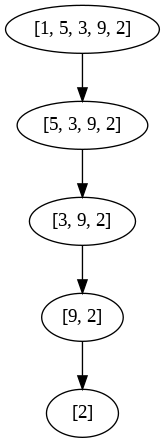

In [ ]:
def find_max_graph(L):
    graph = Digraph(comment="Árvore de Chamadas - find_max")

    def recurse(sublist, node_id):
        label = f"{sublist}"
        graph.node(node_id, label)

        if len(sublist) == 1:
            return sublist[0]

        # Cria o próximo nó para o subproblema L[1:]
        next_node_id = f"{node_id}_1"
        graph.edge(node_id, next_node_id)

        max_rest = recurse(sublist[1:], next_node_id)
        result = sublist[0] if sublist[0] > max_rest else max_rest
        return result

    recurse(L, "root")
    return graph

# Gerar e renderizar a árvore de chamadas
tree = find_max_graph([1, 5, 3, 9, 2])
tree.render('find_max_tree', format='png', cleanup=True)
Image(filename='find_max_tree.png')

### Questão 2

In [ ]:
def reverse(s):
    if len(s) <= 1:
        return s
    else:
        return reverse(s[1:]) + s[0]

reverse('python')

'nohtyp'

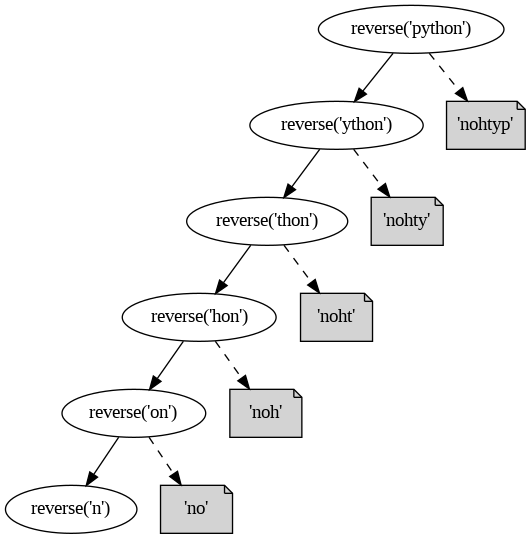

In [ ]:
def reverse_graph(s):
    graph = Digraph(comment="Árvore de Chamadas - reverse")

    def recurse(substring, node_id):
        label = f"reverse('{substring}')"
        graph.node(node_id, label)

        if len(substring) <= 1:
            return substring

        next_node_id = f"{node_id}_1"
        graph.edge(node_id, next_node_id)

        rest = recurse(substring[1:], next_node_id)
        result = rest + substring[0]

        # Adiciona o resultado da concatenação como anotação
        result_node = f"{node_id}_res"
        graph.node(result_node, f"'{result}'", shape="note", style="filled", fillcolor="lightgrey")
        graph.edge(node_id, result_node, style="dashed")

        return result

    recurse(s, "root")
    return graph

# Gerar e renderizar a árvore de chamadas
tree = reverse_graph("python")
tree.render('reverse_tree', format='png', cleanup=True)
Image(filename='reverse_tree.png')

### Questão 3

In [ ]:
def sum_digits(n):
    if n < 10:
        return n
    else:
        return n % 10 + sum_digits(n // 10)

sum_digits(1234)

10

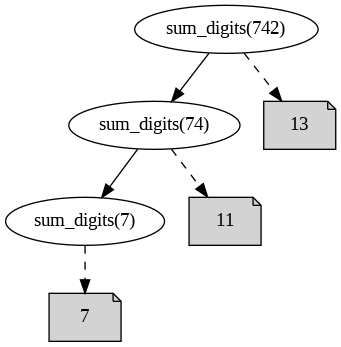

In [ ]:
def sum_digits_graph(n):
    graph = Digraph(comment="Árvore de Chamadas - sum_digits")

    def recurse(n, node_id):
        label = f"sum_digits({n})"
        graph.node(node_id, label)

        if n < 10:
            # Nó final com resultado direto
            result_node = f"{node_id}_res"
            graph.node(result_node, f"{n}", shape="note", style="filled", fillcolor="lightgrey")
            graph.edge(node_id, result_node, style="dashed")
            return n

        next_n = n // 10
        next_node_id = f"{node_id}_next"
        graph.edge(node_id, next_node_id)

        result = n % 10 + recurse(next_n, next_node_id)

        # Mostra o valor somado nesse nível
        result_node = f"{node_id}_res"
        graph.node(result_node, f"{result}", shape="note", style="filled", fillcolor="lightgrey")
        graph.edge(node_id, result_node, style="dashed")

        return result

    recurse(n, "root")
    return graph

# Gerar e salvar a imagem da árvore
tree = sum_digits_graph(742)
tree.render('sum_digits_tree', format='png', cleanup=True)
Image(filename='sum_digits_tree.png')

$$T(n) = T(n / 10) + 1, n \geq 10, T(n < 10) = 0$$
$$n = 10^k$$
$$T(10^k) = T(10^{k-1}) + 1$$
$$= T(10^{k-2}) + 1 + 1$$
$$= T(10^{k-3}) + 1 + 1 + 1$$
$$...$$
$$T(10^{k-i}) + i$$
$$k-i = 0, k=i$$
$$= T(0) + k = k = log_{10} n$$

### Questão 4

In [ ]:
def is_palindrome(s):
    if len(s) <= 1:
        return True
    elif s[0] != s[-1]:
        return False
    else:
        return is_palindrome(s[1:-1])

print(is_palindrome('racecar'))
print(is_palindrome('hello'))

True
False


$$T(n) = T(n - 2) + n, n \geq 10, T(n < 10) = 0$$
$$n = 10^k$$
$$T(10^k) = T(10^{k-1}) + 1$$
$$= T(10^{k-2}) + 1 + 1$$
$$= T(10^{k-3}) + 1 + 1 + 1$$
$$...$$
$$T(10^{k-i}) + i$$
$$k-i = 0, k=i$$
$$= T(0) + k = k = log_{10} n$$

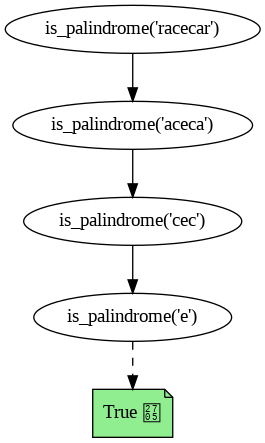

In [ ]:
def is_palindrome_graph(s):
    graph = Digraph(comment="Árvore de Chamadas - is_palindrome")

    def recurse(s, node_id):
        label = f"is_palindrome('{s}')"
        graph.node(node_id, label)

        if len(s) <= 1:
            res_node = f"{node_id}_res"
            graph.node(res_node, "True ✅", shape="note", style="filled", fillcolor="lightgreen")
            graph.edge(node_id, res_node, style="dashed")
            return True

        if s[0] != s[-1]:
            res_node = f"{node_id}_res"
            graph.node(res_node, "False ❌", shape="note", style="filled", fillcolor="lightcoral")
            graph.edge(node_id, res_node, style="dashed")
            return False

        next_s = s[1:-1]
        next_node_id = f"{node_id}_next"
        graph.edge(node_id, next_node_id)

        result = recurse(next_s, next_node_id)

        return result

    recurse(s, "root")
    return graph

# Gerar a árvore para 'racecar'
tree = is_palindrome_graph('racecar')
tree.render('is_palindrome_tree', format='png', cleanup=True)
Image(filename='is_palindrome_tree.png')

## Capítulo 10

In [ ]:
def process(s):
  stack = []

  for char in s:
    if char == '#':
      stack.pop()
    else:
      stack.append(char)

  return ''.join(stack)

process('ab#cd#efg')

'acefg'

### Questão 5

In [ ]:
def fib(n, memo={}):
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    memo[n] = fib(n - 1, memo) + fib(n - 2, memo)
    return memo[n]

fib(10)

55

### Questão 6

In [ ]:
def min_coins(coins, amount):
    # Inicializa um array para armazenar o mínimo de moedas para cada valor até amount
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0  # zero moedas para formar o valor 0

    for coin in coins:
        for x in range(coin, amount + 1):
            dp[x] = min(dp[x], dp[x - coin] + 1)

    return dp[amount] if dp[amount] != float('inf') else -1

min_coins([1, 3, 4], 6)

2

In [ ]:
float('inf')

inf

### Questão 7

In [ ]:
def lcs(X, Y):
    m, n = len(X), len(Y)
    # Cria uma matriz (m+1) x (n+1) para armazenar os resultados parciais
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Preenche a matriz
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if X[i - 1] == Y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[m][n]

### Questão 8

In [ ]:
def knapsack(W, weights, values):
    n = len(weights)
    # Cria uma matriz (n+1) x (W+1) com valores iniciais 0
    dp = [[0] * (W + 1) for _ in range(n + 1)]

    # Preenche a matriz dp
    for i in range(1, n + 1):
        for w in range(W + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(
                    values[i - 1] + dp[i - 1][w - weights[i - 1]],  # inclui o item
                    dp[i - 1][w]  # exclui o item
                )
            else:
                dp[i][w] = dp[i - 1][w]

    return dp[n][W]

knapsack(50, [10, 20, 30], [60, 100, 120])

220

## Capítulo 11

### Questão 9

In [ ]:
def binary_search(L, x):
    if not L:
        return False
    mid = len(L) // 2
    if L[mid] == x:
        return True
    elif x < L[mid]:
        return binary_search(L[:mid], x)
    else:
        return binary_search(L[mid + 1:], x)

print(binary_search([ 1 , 3 , 5 , 7 , 9 ] , 3))
print(binary_search([ 1 , 3 , 5 , 7 , 9 ] , 4))

True
False


### Questão 10

In [ ]:
def binary_search_first(L, x):
    low, high = 0, len(L) - 1
    result = -1  # valor padrão para "não encontrado"

    while low <= high:
        mid = (low + high) // 2

        if L[mid] == x:
            result = mid      # possível primeira ocorrência
            high = mid - 1    # continua procurando à esquerda
        elif L[mid] < x:
            low = mid + 1
        else:
            high = mid - 1

    return result

### Questão 11

In [ ]:
def sqrt_binary(n):
    if n < 2:
        return n  # A raiz quadrada de 0 é 0 e de 1 é 1

    low, high = 0, n
    while low <= high:
        mid = (low + high) // 2
        square = mid * mid

        if square == n:
            return mid
        elif square < n:
            low = mid + 1
        else:
            high = mid - 1

    return high  # O maior valor tal que high^2 <= n

print(sqrt_binary(10))
print(sqrt_binary(16))

3
4


### Questão 12

In [ ]:
def find_peak(L):
    def binary_search_peak(low, high):
        mid = (low + high) // 2

        # Verifica se mid é um pico
        if (mid == 0 or L[mid] >= L[mid - 1]) and (mid == len(L) - 1 or L[mid] >= L[mid + 1]):
            return mid
        # Se o elemento da esquerda é maior, procure à esquerda
        elif mid > 0 and L[mid - 1] > L[mid]:
            return binary_search_peak(low, mid - 1)
        # Caso contrário, procure à direita
        else:
            return binary_search_peak(mid + 1, high)

    if not L:
        return None  # lista vazia não tem pico
    return binary_search_peak(0, len(L) - 1)


find_peak([1, 3, 20, 4, 1, 0])

2